In [24]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split

from snippets import (getTopWordsByCategory, 
                      plotTopWordsByCategory, plotTopWords, 
                      plotClassShares, printSampleComments,
                      plotSetIntersections, calculateUncertanityCoeff,
                      plotUncertanityCoeff)

from bag_of_words import (calculateTFIDFscore, fitModel, NbSvmClassifier)
import bag_of_words
from load_data import loadData

from config import DATA_FILE, LABELS, CONTENT, UNIQUE_ID, TEST_SIZE, C
import pyLDAvis.gensim

In [2]:
df = loadData(DATA_FILE)

In [3]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,explan whi the edit make under my usernam hard...,0,0,0,0,0,0
1,000103f0d9cfb60f,daww he match thi background colour I am seemi...,0,0,0,0,0,0
10,0005300084f90edc,fair use rational for imag wonju jpg thank for...,0,0,0,0,0,0
100,003f698d06c9b180,howev the moonlit edit note by golden daph be ...,0,0,0,0,0,0
1000,02baab63953460ab,rex mundi I have creat a stub on rex mundi at ...,0,0,0,0,0,0


In [4]:
df.dtypes

id               object
comment_text     object
toxic             int64
severe_toxic      int64
obscene           int64
threat            int64
insult            int64
identity_hate     int64
dtype: object

In [5]:
df.isnull().sum()

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

In [6]:
df[CONTENT].fillna("unknown", inplace=True)

for col in LABELS:
    print("Labels for %s are: %s" % (col, ', '.join(map(str, df[col].unique()))))

Labels for toxic are: 0, 1
Labels for severe_toxic are: 0, 1
Labels for obscene are: 0, 1
Labels for threat are: 0, 1
Labels for insult are: 0, 1
Labels for identity_hate are: 0, 1


In [7]:
INNOCENT_LABEL = "innocent"
df[INNOCENT_LABEL] = (df[LABELS].sum(axis = 1) == 0).astype(int)
ALL_LABELS = LABELS + [INNOCENT_LABEL]

In [8]:
# Sample comments
printSampleComments(df, CONTENT, LABELS, 3)

TOXIC: 
hey idiot you be the one that be repeatedli undo my edit go away and stop vandalis

also i say unless you suck

i do he just call tiger a racist call the black commun racist and call him a failur at golf doesnt mean he a racist


SEVERE_TOXIC: 
she be a motherfuck i will block you motherfuck shit bitch punch kill swear do nuditi so shut up frickin around give you drug call you name like shit fuck bum poo damn so fucker you will be block and dead you shit and fuck and i will do the rude finger sign you fucker get bad new messag bum oh shit she piss off go piss of butt so you know that you just hear me that i will use a fork to take and destroy your eye and take out your fuckin blood so just piss off butt piss off but i say piss off butt last chanc piss off butt that is it i will kill you pow so see that you be dead and i will carri you now peni dick boob breast poo

and your littl faggot boy propol pray pray littl wonk that i do not find your littl ass and kill you

fuck gook go

/home/magdalena/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:2349: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  if isinstance(obj, collections.Iterator):
/home/magdalena/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:2366: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  return list(data) if isinstance(data, collections.MappingView) else data


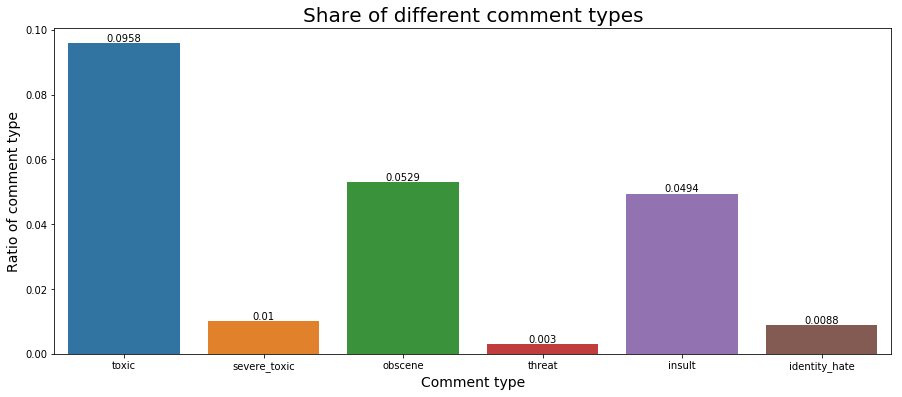

In [9]:
# Analyse share of each label
ratio = df[LABELS].mean()
plotClassShares(LABELS, ratio)

There are 159571 comments, but 35098 comment labels.


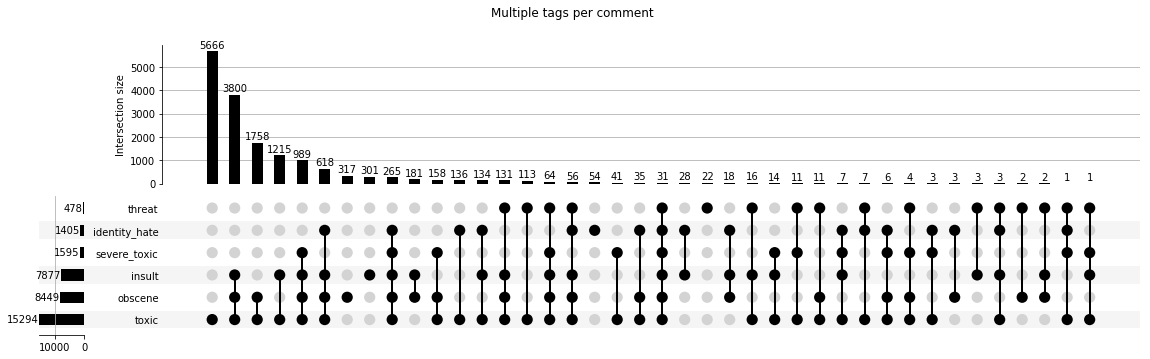

In [11]:
# Multiple labels
print("There are %s comments, but %s comment labels." % (df.shape[0], int(df.shape[0]*ratio.sum())))

df_subset = df.loc[df[INNOCENT_LABEL] == 0]    
plotSetIntersections(df_subset, LABELS, UNIQUE_ID)

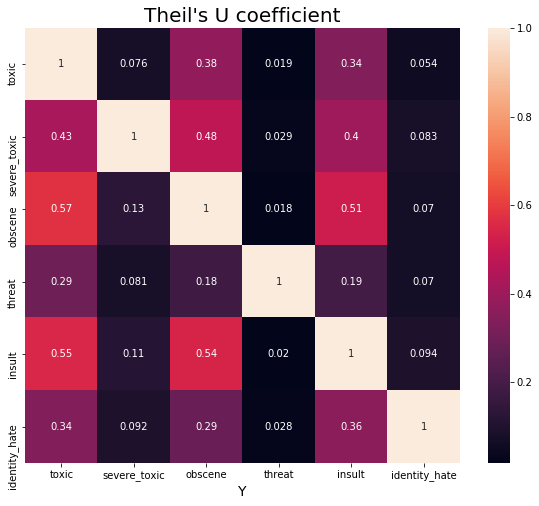

In [13]:
# Theil's U uncertanity coefficient 
# https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9

uncertanity_coeff = calculateUncertanityCoeff(df, LABELS)
plotUncertanityCoeff(uncertanity_coeff, LABELS)

In [15]:
# Calculate TF-IDF (Term Frequency - Inverse Document Frequency) 
word_counts, features = bag_of_words.calculateTFIDFscore(df[CONTENT])

In [16]:
# Sample features
SHOW_FEATURES = 200 
for feature in features:
    print(feature)

DIGIT
I
IP
ORDER
SPAM
URL
YEAR
_
__
___
aa
aap
aaron
ab
abandon
abba
abbey
abbrevi
abc
abd
abduct
abdul
abe
abhira
abi
abid
abil
abl
abnorm
abolish
abomin
aborigin
abort
abov
abraham
abras
abroad
abrupt
absenc
absent
absolut
absolutli
absorb
abstain
abstract
absurd
abu
abund
abundantli
abus
ac
academ
academi
academia
acc
acceler
accent
accept
access
accessd
accid
accident
acclaim
accolad
accommod
accomod
accompani
accomplish
accord
accordingli
account
accredit
accumul
accur
accuraci
accus
ace
acheiv
achiev
acid
acknowledg
acorn
acoust
acquaint
acquir
acquisit
acr
acronym
act
action
activ
activist
actor
actress
actual
acupunctur
acut
ad
adam
adapt
add
addendum
addict
addit
address
adelaid
adequ
adher
adi
adigit
adjac
adject
adjust
adl
admi
admin
administ
administr
administrators_noticeboard
adminship
adminstr
admir
admiss
admit
admittedli
admonish
adolesc
adolf
adopt
ador
adress
adrian
adult
advanc
advantag
adventur
advers
adversari
advert
advertis
advic
advis
advisor
advisori
advoc
adv

catastroph
catch
categor
categori
categoris
cater
cathedr
catherin
cathol
catholic
cattl
caucasian
caucasu
caucu
caus
causal
caution
cautiou
cavalri
cave
caveat
cb
cbc
cc
cccccc
ccp
cd
cdc
cdigit
cdrtool
ce
ceas
ceil
celebr
celesti
celia
cell
cellpad
cellspac
cellular
celtic
cement
cemeteri
cena
censor
censorship
censu
censur
cent
center
centr
central
centraliststupid
centric
centrifug
centuri
ceo
ceoil
ceremoni
certain
certainli
certainti
certif
certifi
cest
cf
cfd
cfm
cg
cgi
ch
cha
chabad
chad
chain
chair
chairman
chaldean
chalk
challeng
chalukya
cham
chamar
chamber
chameleon
chameria
champ
champion
championship
chan
chanc
chancellor
chand
chang
channel
chant
chao
chaotic
chap
chapel
chapman
chapter
charact
character
characteris
characterist
charg
charit
chariti
charl
charli
charlott
charm
chart
charter
chase
chat
chatti
chauvinist
chavez
che
cheap
cheaper
cheat
cheatsheet
check
checker
checklist
checkus
cheek
cheer
chees
cheesei
chelsea
chemic
chemist
chemistri
cheroke
cherri
cheshi

efficaci
effici
effort
egg
ego
egotist
egregi
egypt
egyptian
eh
ei
eighth
einstein
ejacul
ekman
el
elabor
elder
elderli
elect
elector
electr
electromagnet
electron
eleg
eleland
element
elementari
eleph
elev
elf
eli
elig
elimin
elit
elitist
elizabeth
elkspeak
elli
elliott
elonka
eloqu
els
elsewher
elucid
elvi
elwood
em
email
emb
embarass
embarrass
embassi
embellish
emblem
embodi
embrac
emerg
emigr
emili
emilio
emin
eminem
emiss
emit
emma
emmi
emo
emot
emperor
emphas
emphasi
emphasis
emphat
empir
employ
employe
empow
empti
emul
en
enabl
enact
enclos
encod
encompass
encount
encourag
encrypt
encyclopaed
encyclopaedia
encycloped
encyclopedia
encylopedia
end
endang
endeavor
endeavour
endless
endlessli
endors
endow
endur
enemi
energi
enforc
eng
engag
engin
england
english
enhanc
enigmaman
enjoy
enlarg
enlighten
enlist
enorm
enquir
enquiri
enrich
enrol
ensembl
ensign
enslav
ensu
ensur
ent
entail
entangl
enter
enterpris
entertain
enthusiasm
enthusiast
entir
entireti
entiti
entitl
entranc
entren

implicit
implicitli
impolit
import
importantli
impos
imposs
impost
impot
impract
impress
imprison
improb
improp
improperli
improv
impuls
imput
inabl
inaccur
inaccuraci
inact
inadequ
inadvert
inan
inappropri
inaugur
incap
incarn
incent
incest
inch
incid
incident
incit
incivil
inclin
includ
inclus
inclusionist
incoher
incom
incompat
incompet
incomplet
incomprehens
inconsist
inconveni
incorpor
incorrect
incorrectli
increas
increasingli
incred
increment
incub
incumb
incur
inde
indef
indefinit
indent
independ
index
indi
india
indian
indiana
indic
indict
indiffer
indigen
indirect
indirectli
indiscrimin
indisput
individu
indo
indonesia
indonesian
indoor
indu
induc
induct
indulg
industri
ineffect
ineffici
inept
inequ
inerti
inertia
inevit
inexperienc
infact
infal
infam
infant
infantri
infect
infer
inferior
infiltr
infin
infinit
infinitesim
inflammatori
inflat
inflict
influenc
influenti
info
infobox
inform
infract
infrastructur
infring
ing
ingredi
inhabit
inher
inherit
initi
inject
injur
injuri

nam
nambla
namespac
nanci
napoleon
narr
narrat
narrow
narrowli
naruto
nasa
nasal
nascar
nash
nasti
nat
nate
nathan
nation
nationalist
nativ
nato
natur
naughti
naval
navbox
navi
navig
nawlinwiki
nay
nazi
nazism
nb
nba
nbc
nc
ncaa
ncbi
nccc
nd
ndigit
ndigitb
ndp
ne
near
nearbi
nearest
nearli
neat
neatli
nebraska
neccessari
necess
necessari
necessarili
necessit
neck
ned
need
needl
needlessli
nefari
neg
negat
neglect
neglig
negoti
negro
neighbor
neighborhood
neighbour
neighbourhood
neil
neiln
nelli
nelson
neo
neolog
nepal
nephew
nerd
nerv
nervou
nescio
ness
nest
net
netherland
network
neural
neurolog
neuter
neutral
neutron
nevada
nevermind
new
newbi
newcastl
newcom
newer
newest
newli
newman
news
newslett
newspap
newsweek
newsworthi
newton
nfcc
nfl
ng
ngo
nguyen
nh
nhl
nhrhsyear
ni
nic
nicaragua
nice
nicer
nich
nichola
nick
nicki
nicknam
nicol
nicola
nicosia
niger
nigeria
nigga
niggaz
nigger
night
nightmar
nih
nikko
nikola
nikumaroro
nil
nina
nineteenth
ninja
nintendo
ninth
nippl
nirvana
ni

repetit
rephras
replac
replay
repli
replic
report
reportedli
repositori
repost
repres
represent
repress
reprimand
reprint
reproduc
reproduct
republ
republican
repuls
reput
request
requir
requisit
reread
rescu
research
resembl
resent
reserv
reset
resid
residenti
resign
resist
resolut
resolv
reson
resort
resourc
respect
respond
respons
rest
restart
restat
restaur
restor
restrain
restraint
restrict
restructur
resubmit
result
resum
resurrect
retail
retain
retali
retard
retent
rethink
retir
retitl
retort
retract
retreat
retriev
retroact
retrospect
return
reus
reuter
rev
revamp
reveal
revel
reveng
revenu
rever
reverend
revers
revert
review
revis
revision
revisionist
revisit
reviv
revok
revolt
revolut
revolutionari
revolv
reward
reword
rework
rewrit
rex
rexcurri
rey
reynold
rf
rfa
rfar
rfc
rfcu
rfd
rfpp
rgb
rhaworth
rhetor
rhobit
rhode
rhyme
rhythm
ri
riana
ribbon
rican
ricardo
rice
rich
richard
richi
richmond
rick
ricki
rickk
rico
rid
riddl
ride
rider
ridicul
rifl
rig
right
righteou
rightli


ther
therapeut
therapi
therapist
thereaft
therebi
theredpenofdoom
therefor
thereof
theresa
thermal
thermodynam
thesi
thf
thi
thief
thier
thing
thingi
think
thinker
thirdli
thirteen
thirti
tho
thoma
thompson
thomson
thon
thor
thorn
thorough
thoroughli
thou
thought
thousand
thrace
thracian
thrash
thread
threat
threaten
threshold
thrill
thriller
thrive
throat
throne
throw
thrust
thruster
thu
thug
thumb
thumbnail
thunder
thursday
thwart
thx
ti
tibet
tibetan
tick
ticket
tidbit
tide
tidi
tie
tier
tiger
tight
tighten
til
tild
till
tilt
tim
time
timelin
timer
timestamp
timothi
tin
tini
tinker
tip
tipler
tirad
tire
tireless
tiresom
tissu
tit
titan
titl
tito
tj
tk
tl
tlk
tm
tna
tobacco
tobi
toc
tod
today
todd
toddstdigit
toe
togeth
toilet
token
tokyo
toler
tolkien
toll
tom
tomato
tomb
tome
tommi
tommyyear
tomorrow
ton
tone
tongu
toni
tonight
tool
toolbar
toolserv
tooth
topic
topolog
tor
torah
torch
tori
tornado
toronto
torrent
tort
tortur
tosa
toss
tosser
total
totalitarian
touch
touchi
tough
to

In [18]:
# Get most common words
NUM_WORDS_CAT = 10
NUM_WORDS_ALL = 20
words, counts = getTopWordsByCategory(df, LABELS, word_counts, features, NUM_WORDS_CAT)
words_all, counts_all = getTopWordsByCategory(df, LABELS, word_counts, features, NUM_WORDS_ALL, aggregate = True)

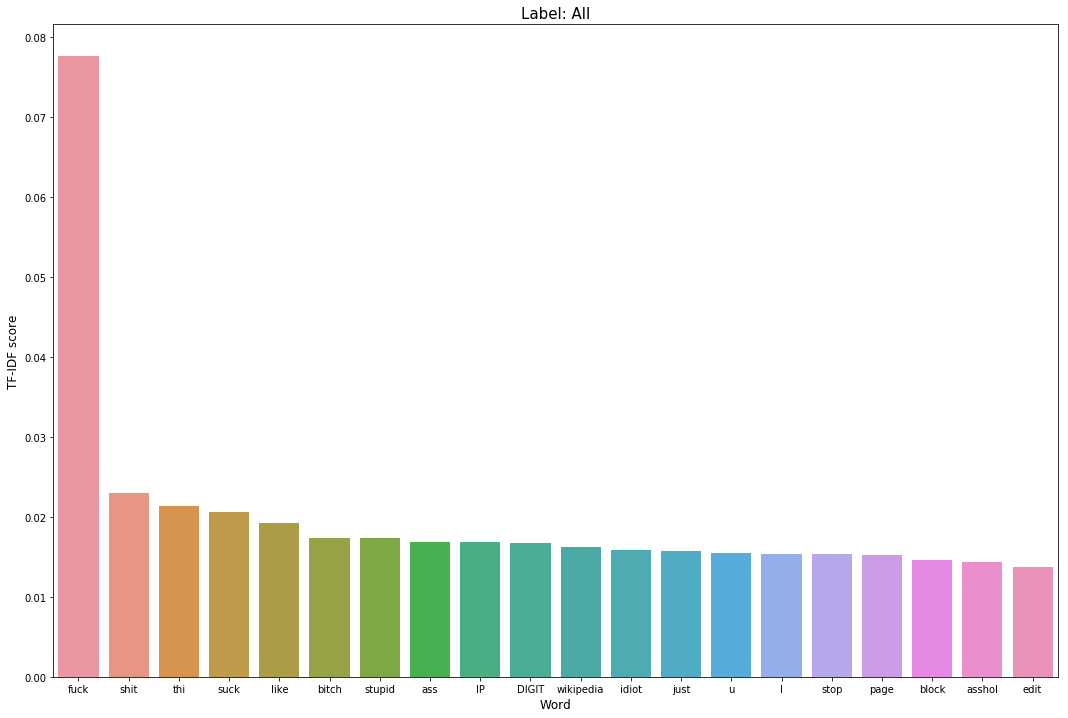

In [19]:
plotTopWords(words_all[0], counts_all[0], "All")

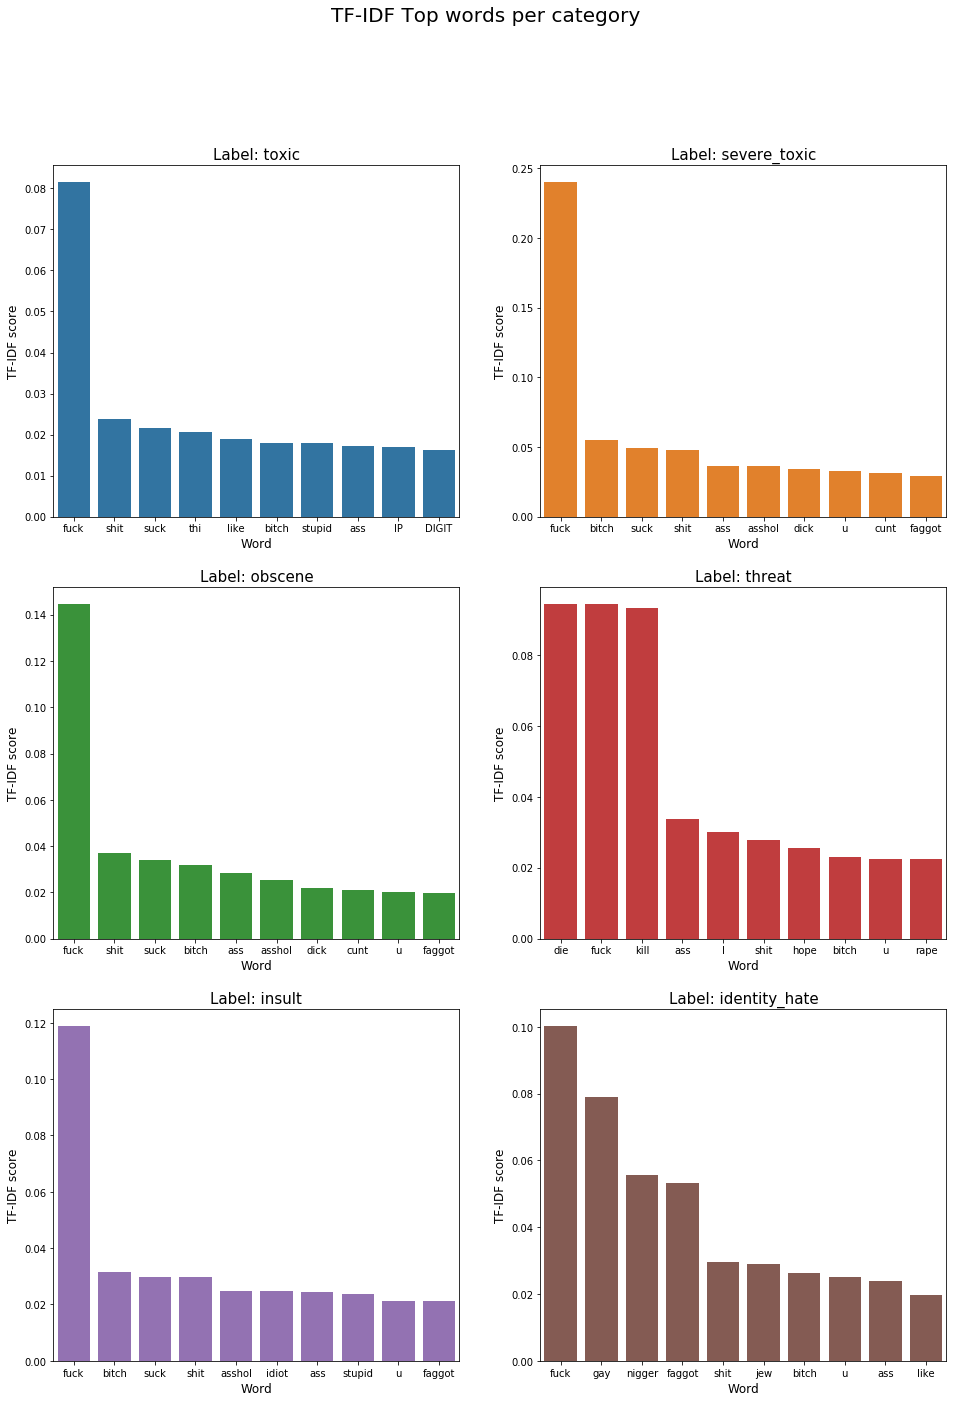

In [20]:
plotTopWordsByCategory(words, counts, LABELS)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(word_counts, df[LABELS], test_size = TEST_SIZE, random_state=123)
model = bag_of_words.NbSvmClassifier(C=C)
metrics_train, metrics_test, measures = bag_of_words.fitModel(model, X_train, X_test, y_train, y_test, LABELS)

Class: toxic
Log loss: 0.08889079058313493
Class: severe_toxic
Log loss: 0.016514142694954423
Class: obscene
Log loss: 0.04276308167253272
Class: threat
Log loss: 0.0037330628843515417
Class: insult
Log loss: 0.05938804742948023
Class: identity_hate
Log loss: 0.013088291881505586


In [26]:
print("Model performance on training set")
pd.DataFrame(metrics_train, columns = LABELS, index = measures)

Model performance on training set


,toxic,severe_toxic,obscene,threat,insult,identity_hate
Accuracy,0.966747,0.993075,0.984623,0.998747,0.977197,0.995065
F1 score,0.808654,0.588071,0.844712,0.755352,0.741818,0.653846
Precision,0.734343,0.489907,0.789676,0.644909,0.666560,0.531250
Recall,0.899699,0.735431,0.907993,0.911439,0.836233,0.850000


In [27]:
print("Model performance on test set")
pd.DataFrame(metrics_test, columns = LABELS, index = measures)

Model performance on test set


,toxic,severe_toxic,obscene,threat,insult,identity_hate
Accuracy,0.961742,0.990318,0.980103,0.997211,0.971017,0.991822
F1 score,0.781065,0.388119,0.796148,0.386207,0.673951,0.391608
Precision,0.707373,0.319218,0.734597,0.294737,0.596382,0.294737
Recall,0.871898,0.494949,0.868956,0.560000,0.774716,0.583333


In [30]:
import gensim
from gensim.models import CoherenceModel, LdaModel, LsiModel, HdpModel
from gensim.models.wrappers import LdaMallet
from gensim.corpora import Dictionary
def dummy_toc(doc):
    return doc.split()

tokenized_text = df[CONTENT].apply(lambda x: dummy_toc(x))

In [31]:
dictionary = Dictionary(tokenized_text)

In [33]:
corpus = [dictionary.doc2bow(text) for text in tokenized_text]
ldamodel = LdaModel(corpus=corpus, num_topics=15, id2word=dictionary)

In [57]:
#LdaModel(corpus=word_counts.transpose(), num_topics=15, id2word=dictionary)
type(word_counts)
#dictionary = dict(zip(list(range(10000)), features))

scipy.sparse.csr.csr_matrix

In [34]:
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)

/home/magdalena/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6     -0.241600 -0.000467       1        1  17.217928
11    -0.191543  0.156265       2        1  16.248079
13    -0.239971 -0.051721       3        1  14.178117
3     -0.226849  0.038433       4        1  12.706208
1     -0.204045 -0.088980       5        1  10.867839
9     -0.199362  0.057619       6        1  10.234161
5     -0.214244  0.034612       7        1  10.042439
4     -0.062024 -0.188523       8        1   3.284047
7      0.071217  0.151936       9        1   1.373983
0      0.059695 -0.173223      10        1   1.020807
8      0.277084  0.236386      11        1   0.840702
14     0.213848 -0.114462      12        1   0.804354
10     0.287159  0.143408      13        1   0.420116
12     0.335626 -0.115167      14        1   0.392290
2      0.335007 -0.086116      15        1   0.368925, topic_info=     Category           Freq       Term          Total  loglift  logprob
term                                                                    
188   Default  226492.000000        you  226492.000000  30.0000  30.0000
17    Default  208899.000000          i  208899.000000  29.0000  29.0000
44    Default   98576.000000      DIGIT   98576.000000  28.0000  28.0000
58    Default  229635.000000          a  229635.000000  27.0000  27.0000
6     Default  481014.000000         be  481014.000000  26.0000  26.0000
35    Default  521814.000000        the  521814.000000  25.0000  25.0000
184   Default   49210.000000  wikipedia   49210.000000  24.0000  24.0000
33    Default   41499.000000       talk   41499.000000  23.0000  23.0000
45    Default   33011.000000       YEAR   33011.000000  22.0000  22.0000
294   Default   66576.000000       your   66576.000000  21.0000  21.0000
868   Default   16857.000000       fuck   16857.000000  20.0000  20.0000
21    Default   47917.000000         my   47917.000000  19.0000  19.0000
131   Default  236889.000000         of  236889.000000  18.0000  18.0000
253   Default   27273.000000         hi   27273.000000  17.0000  17.0000
103   Default   24055.000000         go   24055.000000  16.0000  16.0000
381   Default   38533.000000         is   38533.000000  15.0000  15.0000
113   Default  167781.000000         it  167781.000000  14.0000  14.0000
26    Default   58376.000000       page   58376.000000  13.0000  13.0000
721   Default   11270.000000       wiki   11270.000000  12.0000  12.0000
110   Default  153883.000000         in  153883.000000  11.0000  11.0000
64    Default   46198.000000         an   46198.000000  10.0000  10.0000
10    Default   43611.000000       edit   43611.000000   9.0000   9.0000
88    Default   26562.000000      delet   26562.000000   8.0000   8.0000
196   Default   19800.000000         up   19800.000000   7.0000   7.0000
336   Default   17976.000000       user   17976.000000   6.0000   6.0000
1     Default   11957.000000         IP   11957.000000   5.0000   5.0000
471   Default   11948.000000        are   11948.000000   4.0000   4.0000
193   Default   37770.000000         me   37770.000000   3.0000   3.0000
1522  Default    7816.000000       shit    7816.000000   2.0000   2.0000
23    Default  152559.000000        not  152559.000000   1.0000   1.0000
...       ...            ...        ...            ...      ...      ...
4948  Topic15     419.408142      whore     420.430786   5.5999  -4.5657
3841  Topic15     356.580170      screw     357.602844   5.5995  -4.7280
5252  Topic15     343.568787       SPAM     344.591980   5.5994  -4.7651
6497  Topic15     338.607941      fraud     339.630615   5.5993  -4.7797
3979  Topic15     333.649597    nicknam     334.672821   5.5993  -4.7944
556   Topic15     416.346008      harri     417.630219   5.5993  -4.5730
3369  Topic15     315.920410    fighter     316.950073   5.5991  -4.8490
2513  Topic15     306.691895      singh     307.714600   5.5990  -4.8787
7956  Topic15     276.527588      pussi     27

In [ ]:
# TO DO:
# Use same count matrix for NB-SVM and for topic modelling 
# Implement Classification based on topic modelling
# Implement LSTM